## Bank Churn Project - Hacktiv8

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"Bank_churn_modelling.csv")
df.shape

(10000, 14)

### 2. Data Exploration

In [4]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


    Pengecekan wrong value pada kolom ber-tipe data objek/string.
    Apabila ada value yang aneh, maka akan di drop row data tersebut

In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Analisis
1. Lebih dari 25% nasabah memiliki saldo 0 dalam rekening bank mereka
2. Hanya 51% dari nasabah yang masih aktif menggunakan rekening bank mereka 


### 3. Data Cleaning

In [9]:
## Setelah dilihat terdapat 3 kolom yang tidak memberi pengaruh terhadap analisis
## Dilakukan dropping ketiga kolom tersebut
print(df.shape)
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [11]:
## Pengecekan apabila ada duplikat data pada row
df.duplicated().sum()

0

In [12]:
## Pengecekan apabila ada cell data yang kosong
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
## Pengecekan apakah di dalam dataset terdapat data outliers atau data anomali
## Pengecekan dilakukan dengan melihat skewness pada masing-masing kolom yang tipe - nya numerical
## Kolom Exited memiliki tipe categorikal sehingga tidak terdapat distribusi data
## Jika Skewness > +1 atau < -1 maka bisa dikatakan terdapat data outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

### 4. Data Analytics - Univariate Analytics

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [15]:
cat_cols = ['Geography', 'Gender','HasCrCard', 'IsActiveMember','Exited']
num_cols = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']

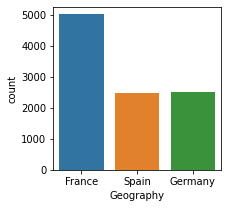

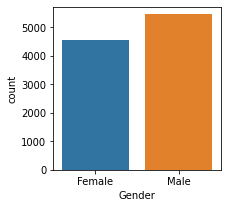

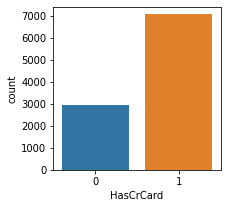

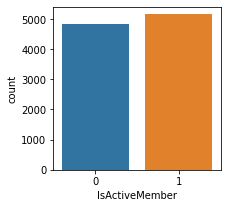

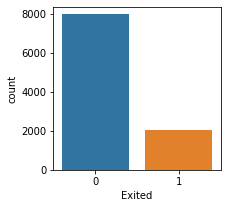

In [16]:
for col in cat_cols:
    plt.figure(figsize=(3,3))
    sns.countplot(df[col])
    plt.show()

Analisis
    - Hampir 50% dari nasabah berasal dari France dan sisanya berasal dari Spain dan Germany
    - Kurang lebih 55% nasabah ber-jenis kelamin pria dan sisanya wanita
    - Sekitar 50% nasabah tidak aktif menggunakan akun rekening bank mereka
    - Hampir 70% nasabah memiliki credit card
    - Sekitar 20% nasabah meninggalkan Bank Churn


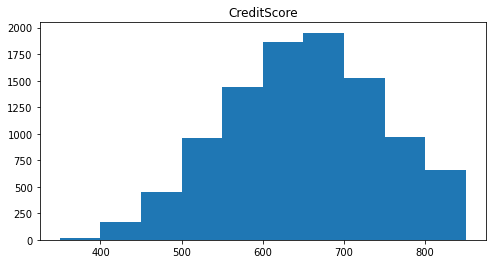

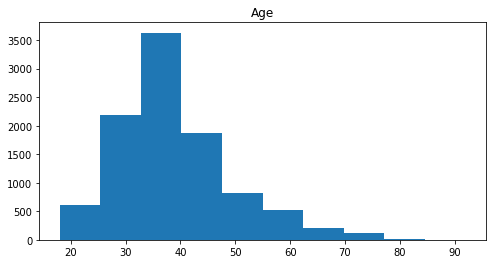

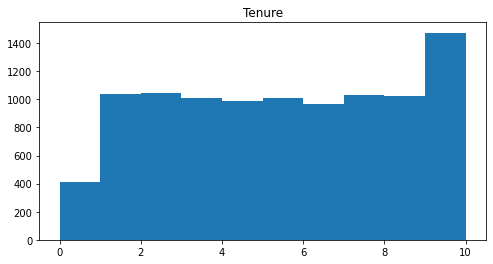

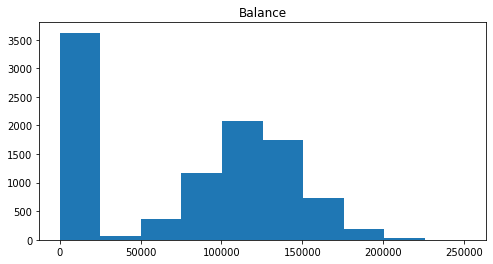

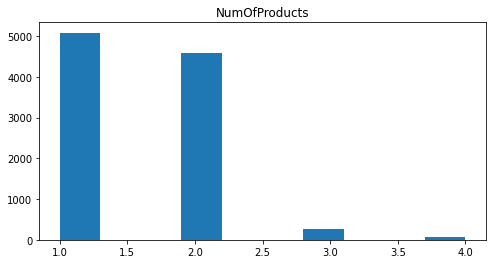

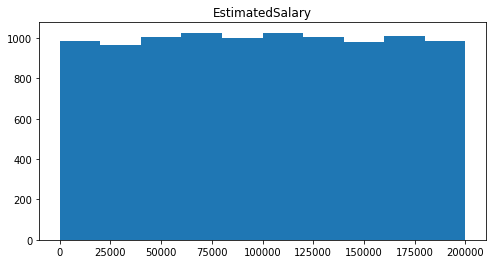

In [17]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Analytics - 
    - Kolom Estimated Salary dan tenure memiliki distribusi uniform 
    - Kebanyakan nasabah memiliki usia antara 25 s/d 50, ada data outliers usia>80
    - Jika berdasarkan saldo, terdapat dua group data, nasabah yang memiliki saldo = 0, dan nasabah yang memiliki saldo antara 75K s/d 200k
    - Sebagian besar nasabah memiliki creditscore antara 450 s/d 850
    - Sebagian besar nasabah memiliki 1 or 2 produk perbankan, sangat sedikit yang memiliki 3 atau 4 produk dari bank


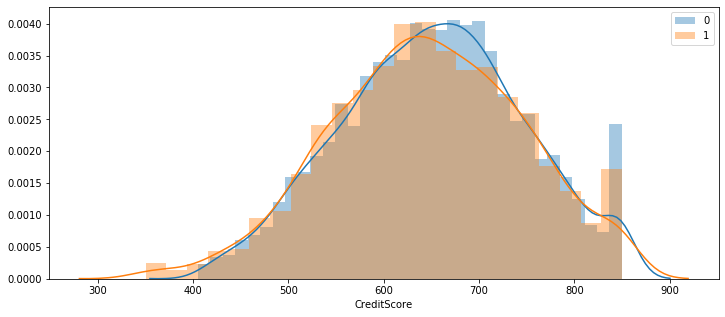

In [16]:
# Numeric v/s categorical
# creditscore v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df["CreditScore"][df["Exited"]==0])
sns.distplot(df["CreditScore"][df["Exited"]==1])
plt.legend(["0","1"])
plt.show()


Analytics - 
    - both the distributions of CreditScore for Customers with Exited =0 and Exited =1 are almost
    overlapping eachother, thus at every value of creitscore there is almost similar 
    density of customers leaving and not leaving the bank, thus creditscore has no information to 
    say why customers left the bank.


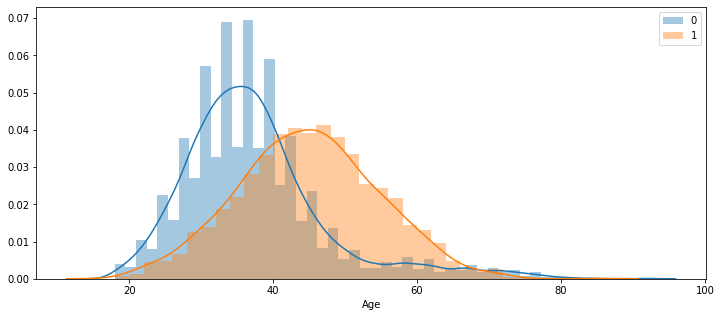

In [17]:
# Numeric v/s categorical
# Age v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df["Age"][df["Exited"]==0])
sns.distplot(df["Age"][df["Exited"]==1])
plt.legend(["0","1"])
#plt.xlim([40,90])
plt.show()

Analytics - 
    - out of two distributions of creditscore, for age<40, distrobution of age of customers not leaving is higher compared to distribution of age of customers leaving the bank where as for 
    age more than 40, distribution of age of customers leaving the bank is higher compared to not leaving. Thus most of old age customers left the bank.


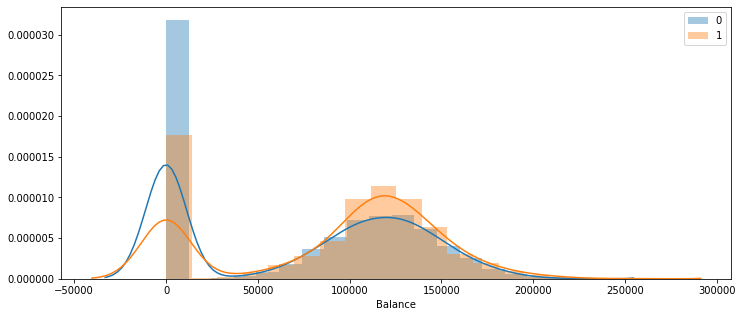

In [18]:
# Numeric v/s categorical
# Balance v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df["Balance"][df["Exited"]==0])
sns.distplot(df["Balance"][df["Exited"]==1])
plt.legend(["0","1"])
#plt.xlim([40,90])
plt.show()

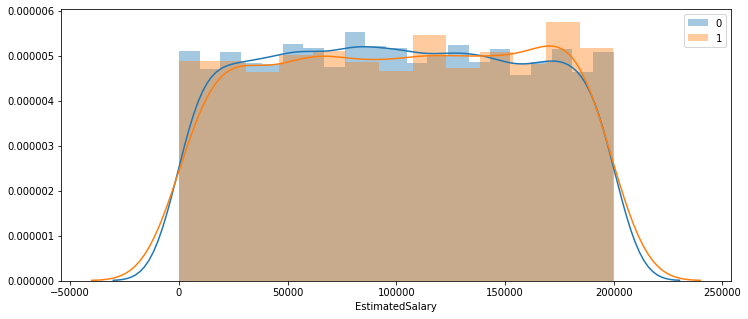

In [19]:
# Numeric v/s categorical
# EstimatedSalary v/s Exited
plt.figure(figsize=(12,5))
sns.distplot(df["EstimatedSalary"][df["Exited"]==0])
sns.distplot(df["EstimatedSalary"][df["Exited"]==1])
plt.legend(["0","1"])
#plt.xlim([40,90])
plt.show()

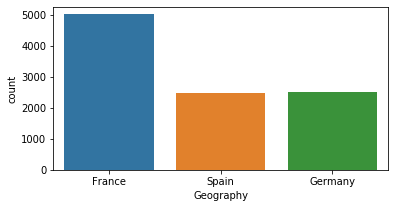

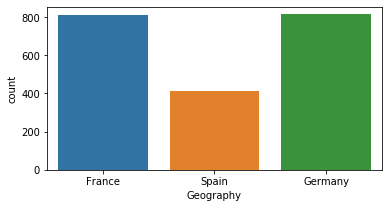

In [28]:
# categorical v/s categorical
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['Geography'][df["Exited"]==1])
plt.show()


In [20]:
out = pd.crosstab(df['Gender'],df['Exited'], margins=True)
out[1]/out['All']

Gender
Female    0.250715
Male      0.164559
All       0.203700
dtype: float64

Analytics - 
    - Female customers have higher dropout rate compared to the male custoemrs


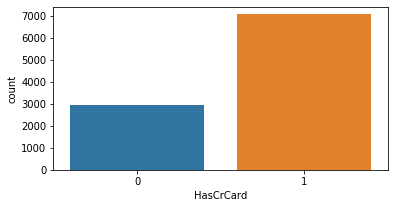

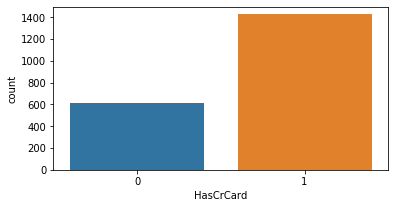

In [21]:
# categorical v/s categorical
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'])
plt.show()
plt.figure(figsize=(6,3))
sns.countplot(df['HasCrCard'][df["Exited"]==1])
plt.show()

In [22]:
out = pd.crosstab(df['HasCrCard'],df['Exited'], margins=True)
out[1]/out['All']

HasCrCard
0      0.208149
1      0.201843
All    0.203700
dtype: float64

### Multivariate
- numeric v/s numeric v/s categorical - scatterplot
- numeric v/s categorical v/s categorical - pointplot / swarmplot / boxplot


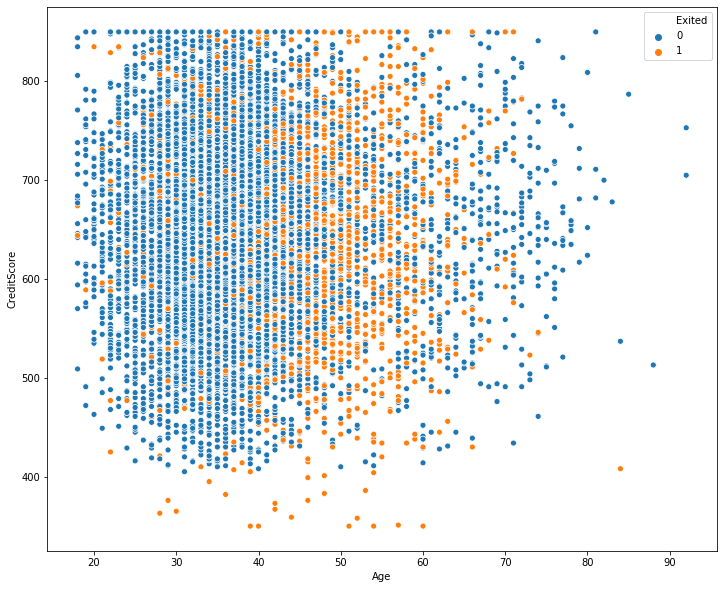

In [27]:
# numeric v/s numeric v/s categorical
plt.figure(figsize=(12,10))
sns.scatterplot(x="Age",y="CreditScore",hue="Exited",data=df)
plt.show()

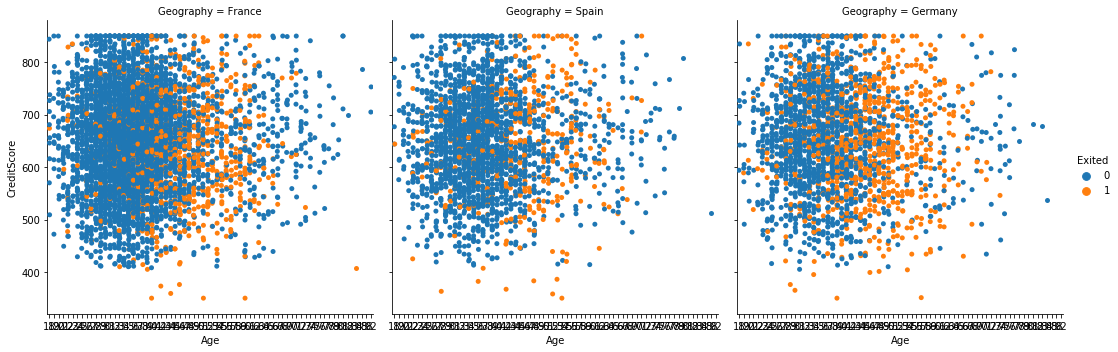

In [28]:
sns.catplot(x="Age",y="CreditScore",hue="Exited",col='Geography',data=df,kind='strip')
plt.show()

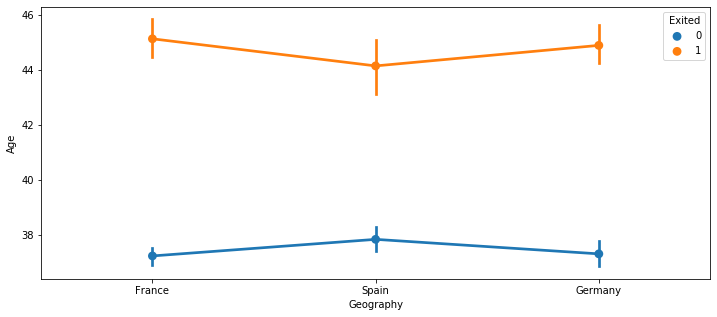

In [29]:
# numeric vs categorical vs categorical
# Age vs Geography vs Exited = pointplot

plt.figure(figsize=(12,5))
sns.pointplot(x="Geography",y="Age",hue="Exited", data=df)
plt.show()

#### EDA using statistics
correlation analysis

In [31]:
cor = df.corr()

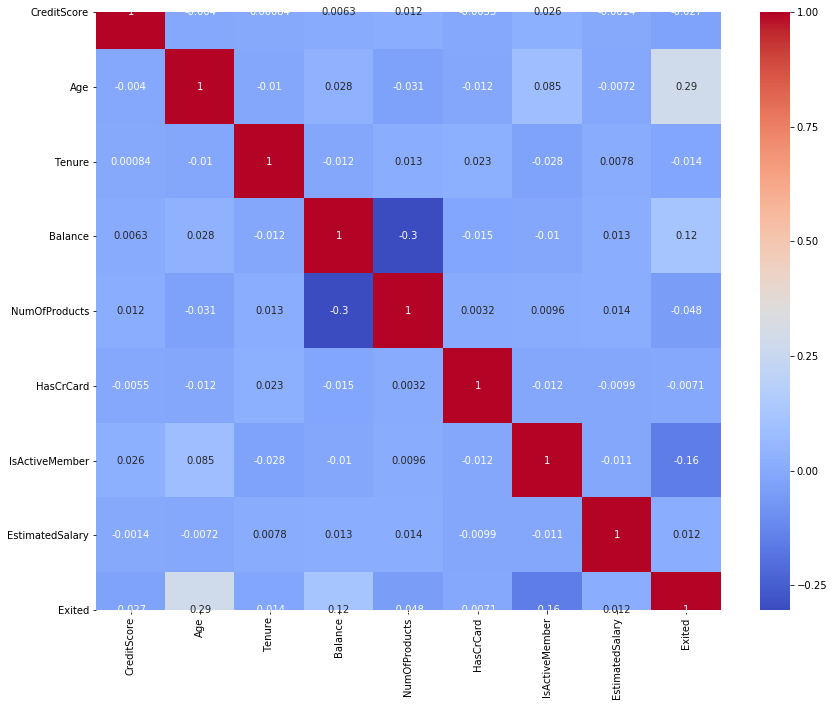

In [33]:
# use heatmap to visualize correlation

plt.figure(figsize=(14,11))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()